In [8]:
source('../01-pca-and-regression/src/multiplot.r')

In [9]:
set.seed(2)

xx <- 1:100
yy <- 20 + 3* xx
error <- rnorm(100,0,60)
yy <- yy + error
df = data.frame(x=xx, y=yy)

In [10]:
fit.xy <- lm(x ~ y, data = df)
fit.yx <- lm(y ~ x, data = df)
df$predicted_y <- predict(fit.yx)
df$predicted_x <- predict(fit.xy)
df$residuals_y <- residuals(fit.yx)
df$residuals_x <- residuals(fit.xy)

In [11]:
library(repr)
options(repr.plot.width=20, repr.plot.height=8)

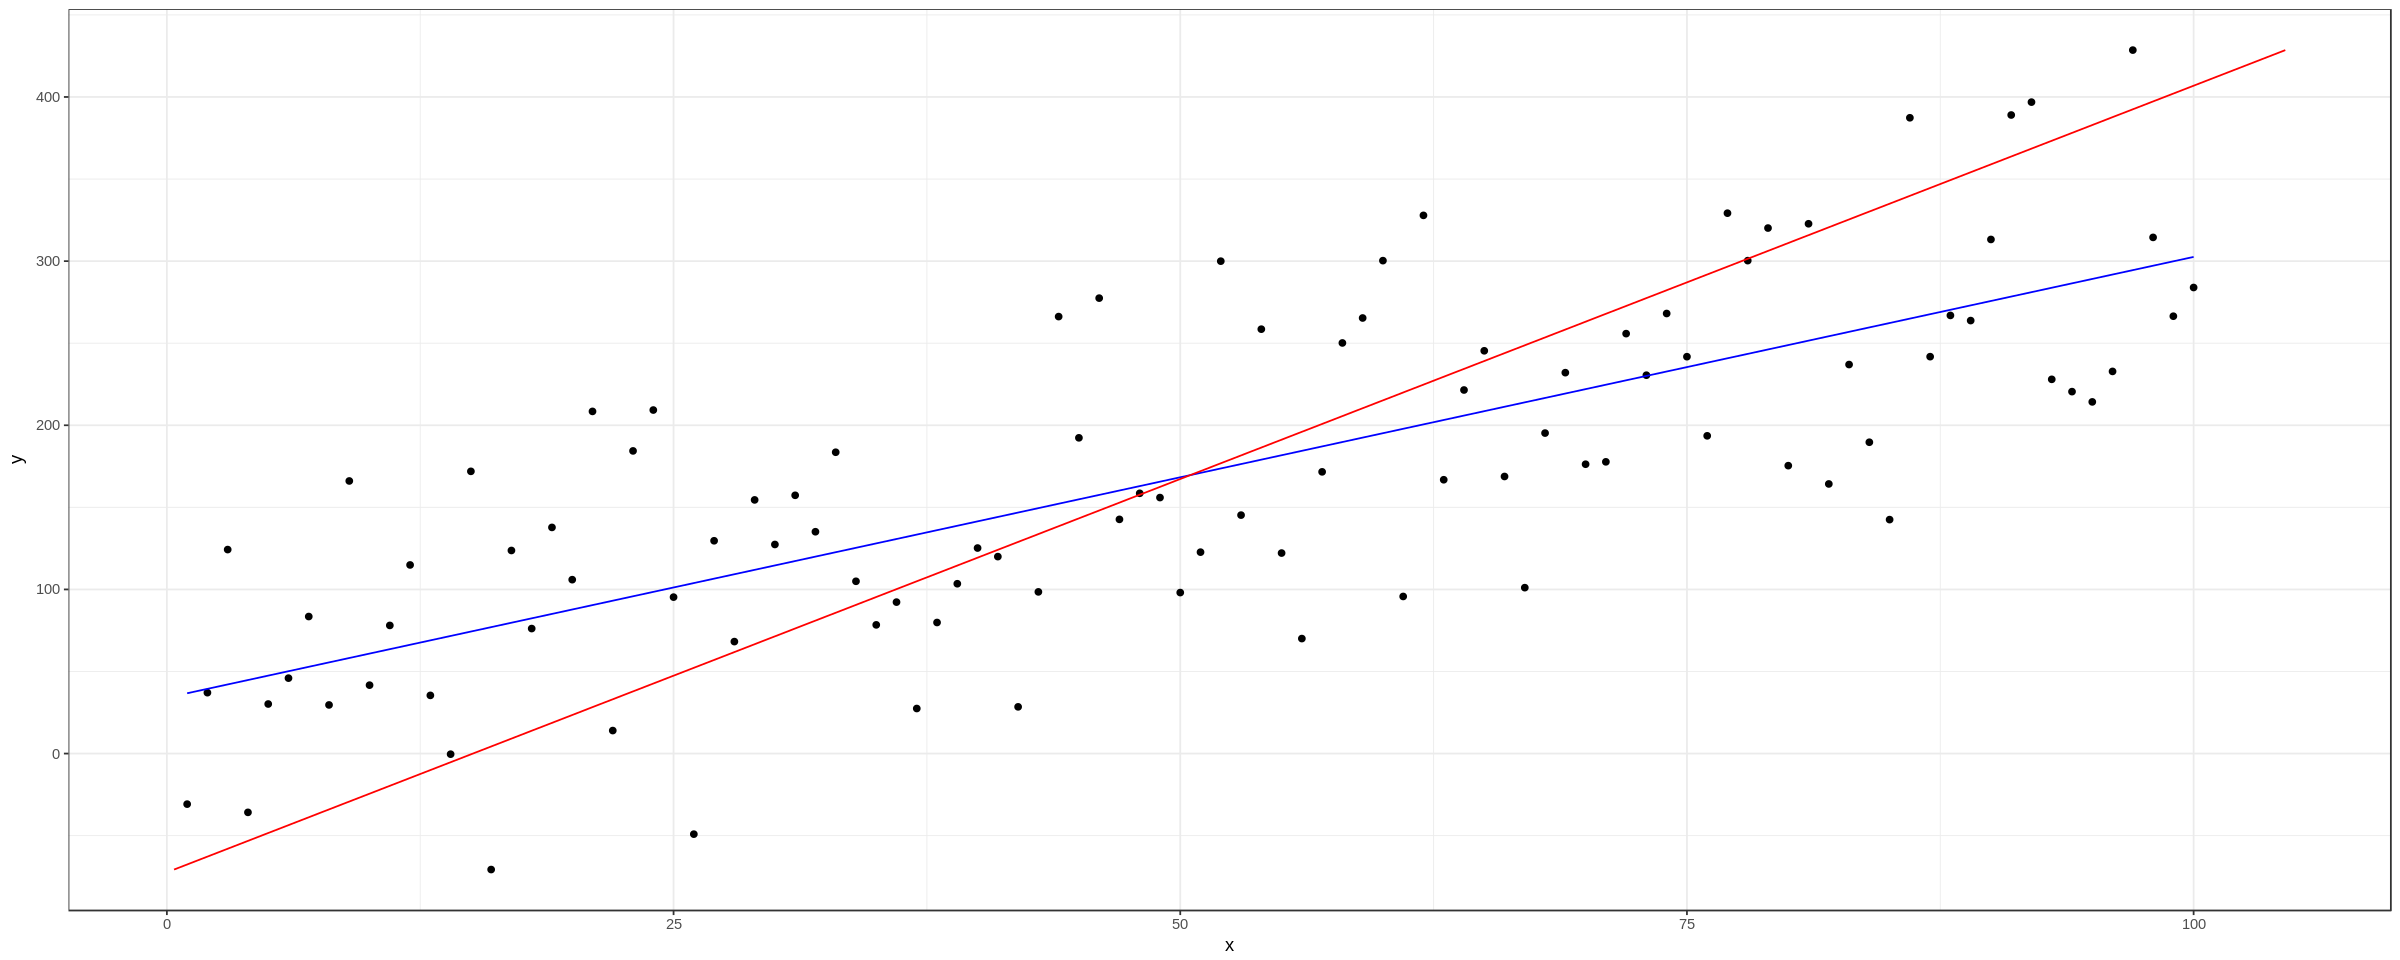

In [12]:
library(ggplot2)

ggplot(df) + 
  theme_bw() +
  geom_point(aes(x = x, y = y), color = "black") +
  geom_line(aes(x = x, y = predicted_y), color = "blue")+
  geom_line(aes(x = predicted_x, y = y), color = "red")

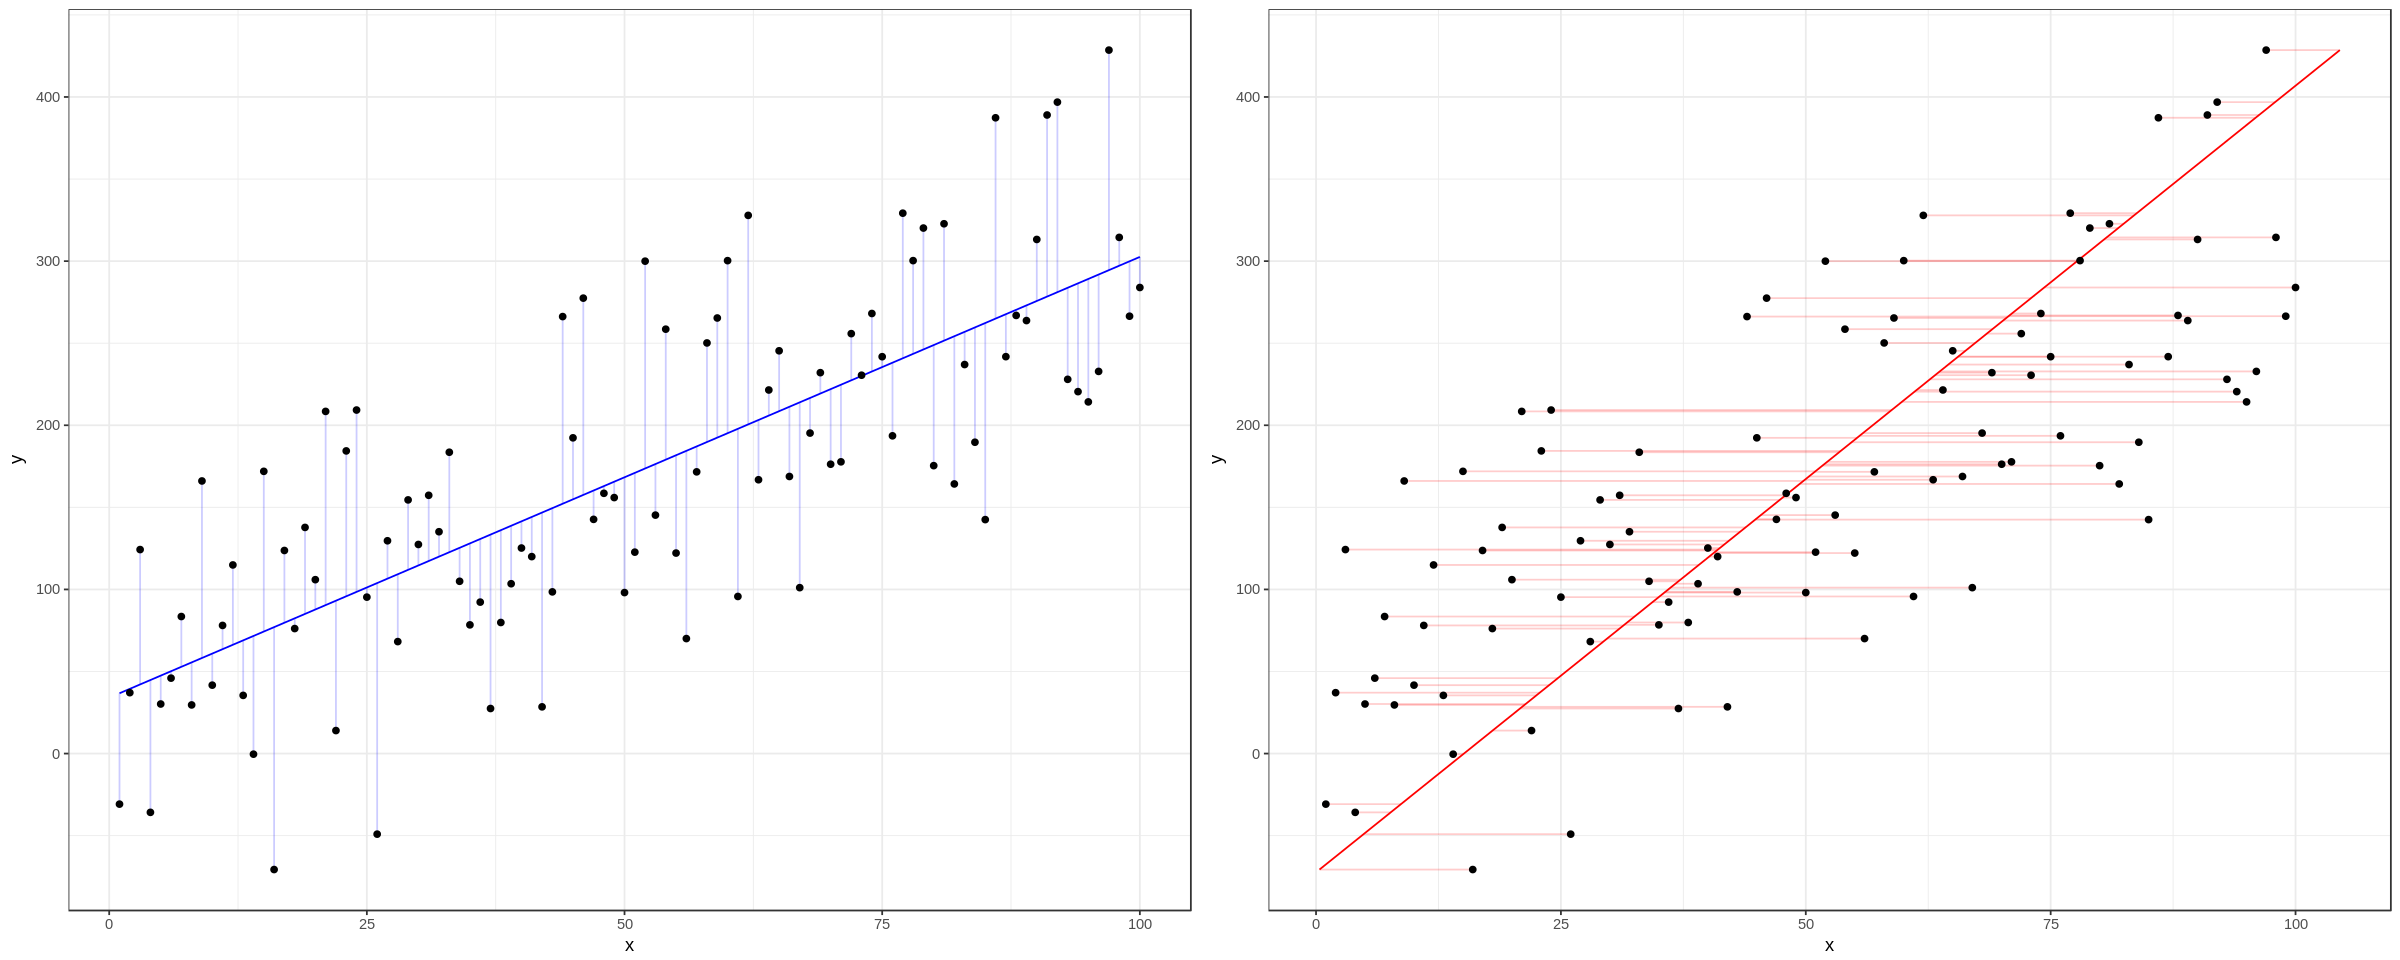

In [13]:
p1 <- ggplot(df, aes(x = x, y = y)) +
  theme_bw() +
  geom_line(aes(y = predicted_y), color = "blue") +
  geom_segment(aes(xend = x, yend = predicted_y), color="blue", alpha = .2) +  
  geom_point() 

p2 <- ggplot(df, aes(x = x, y = y)) +
  theme_bw() +
  geom_line(aes(x = predicted_x), color = "red") +
  geom_segment(aes(xend = predicted_x, yend = y), color="red", alpha = .2) +  
  geom_point() 

multiplot(p1, p2, cols = 2)

In [14]:
df$x_norm <- xx - mean(xx)
df$y_norm <- yy - mean(yy)

In [15]:
df.pca <- prcomp(subset(df, select=c(x_norm,y_norm)), center=F, scale=F)

In [16]:
df.pca

Standard deviations (1, .., p=2):
[1] 106.38917  18.81842

Rotation (n x k) = (2 x 2):
              PC1        PC2
x_norm -0.2108664 -0.9775149
y_norm -0.9775149  0.2108664

In [17]:
pcs <- df.pca$rotation

In [18]:
yx.lm <- lm(yy ~ xx)
xy.lm <- lm(xx ~ yy)

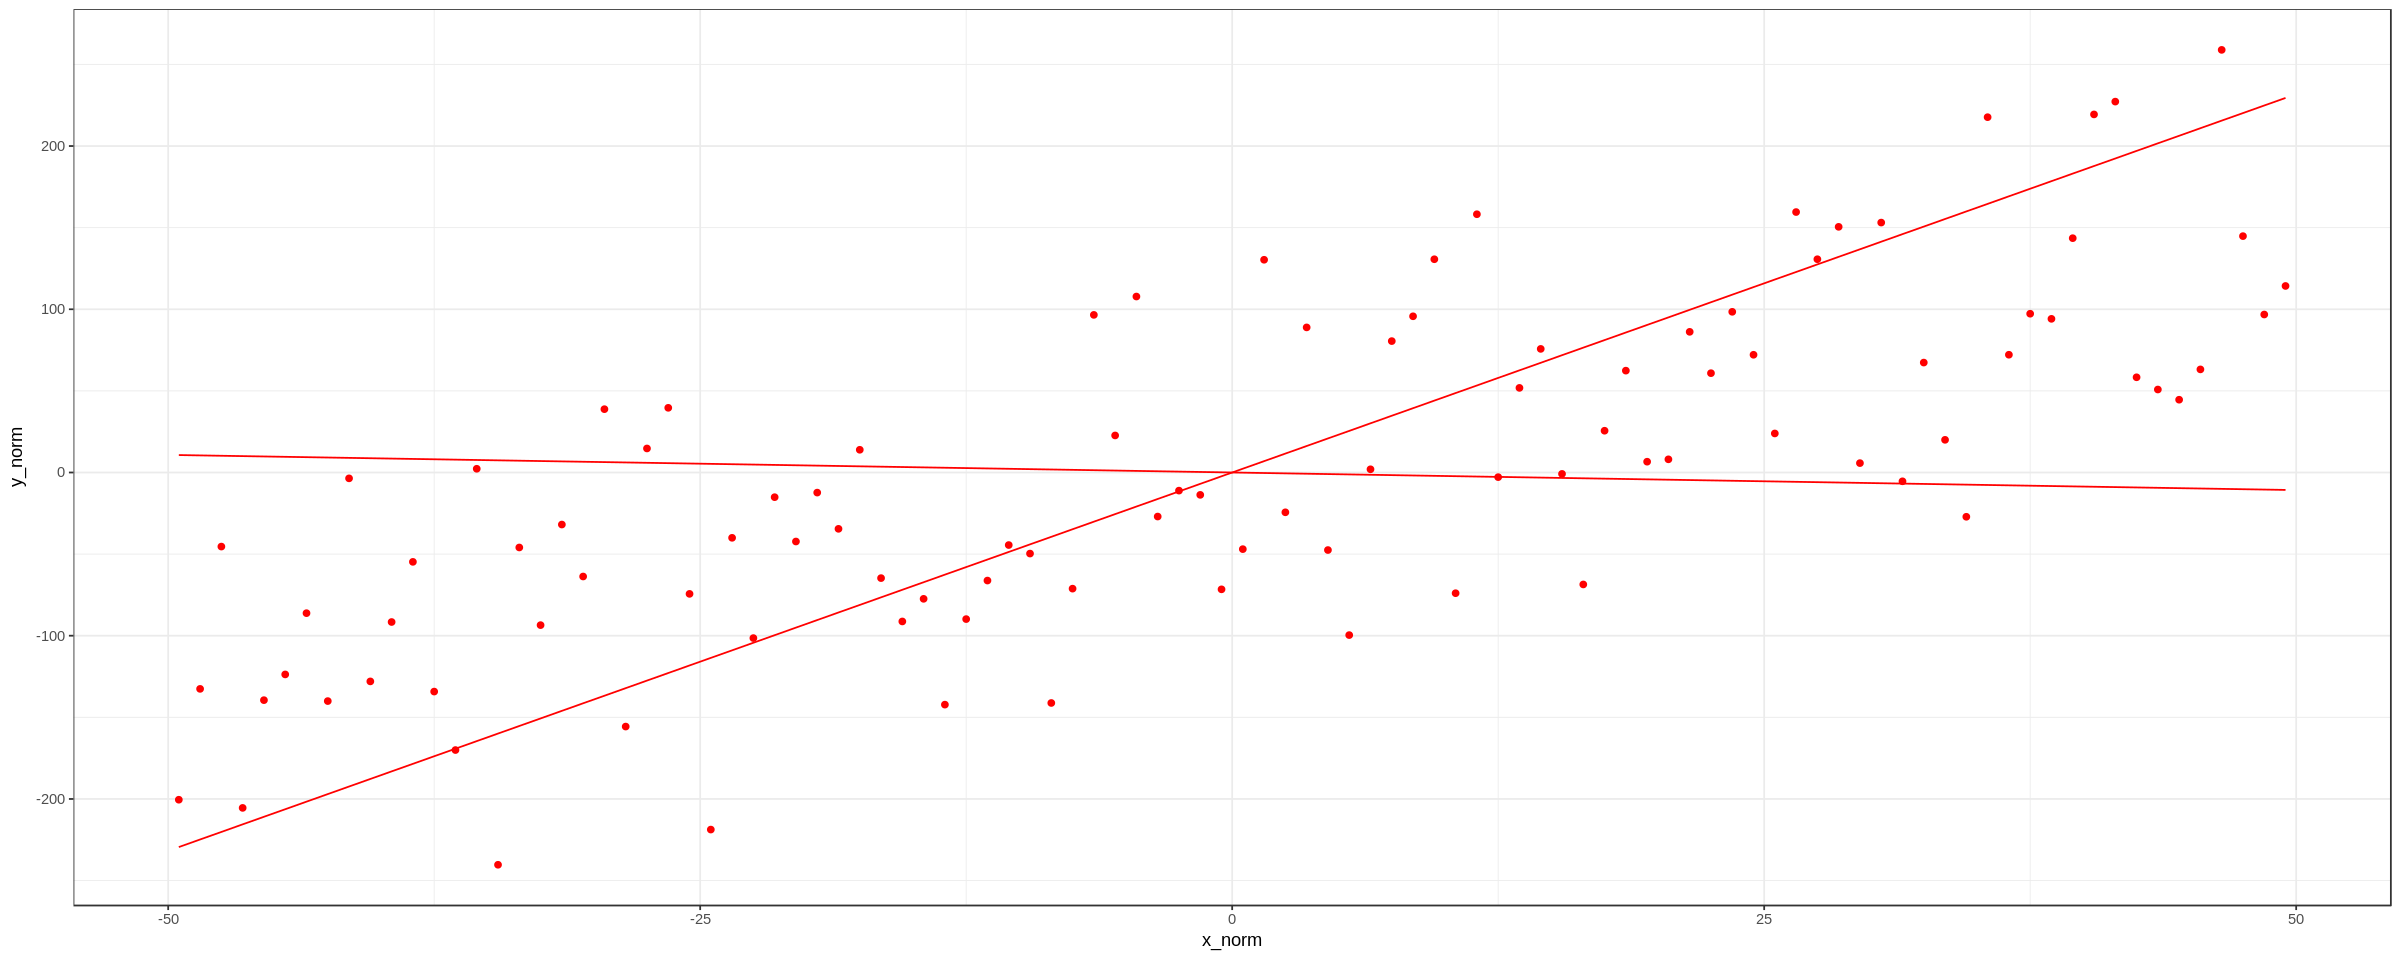

In [19]:
ggplot(df) + 
  theme_bw() +
  geom_point(aes(x = x_norm, y = y_norm), color = "red") +
  geom_line(aes(x = x_norm, y = pcs[2,1]/pcs[1,1] * x_norm), color = "red") +
  geom_line(aes(x = x_norm, y = pcs[2,2]/pcs[1,2] * x_norm), color = "red")

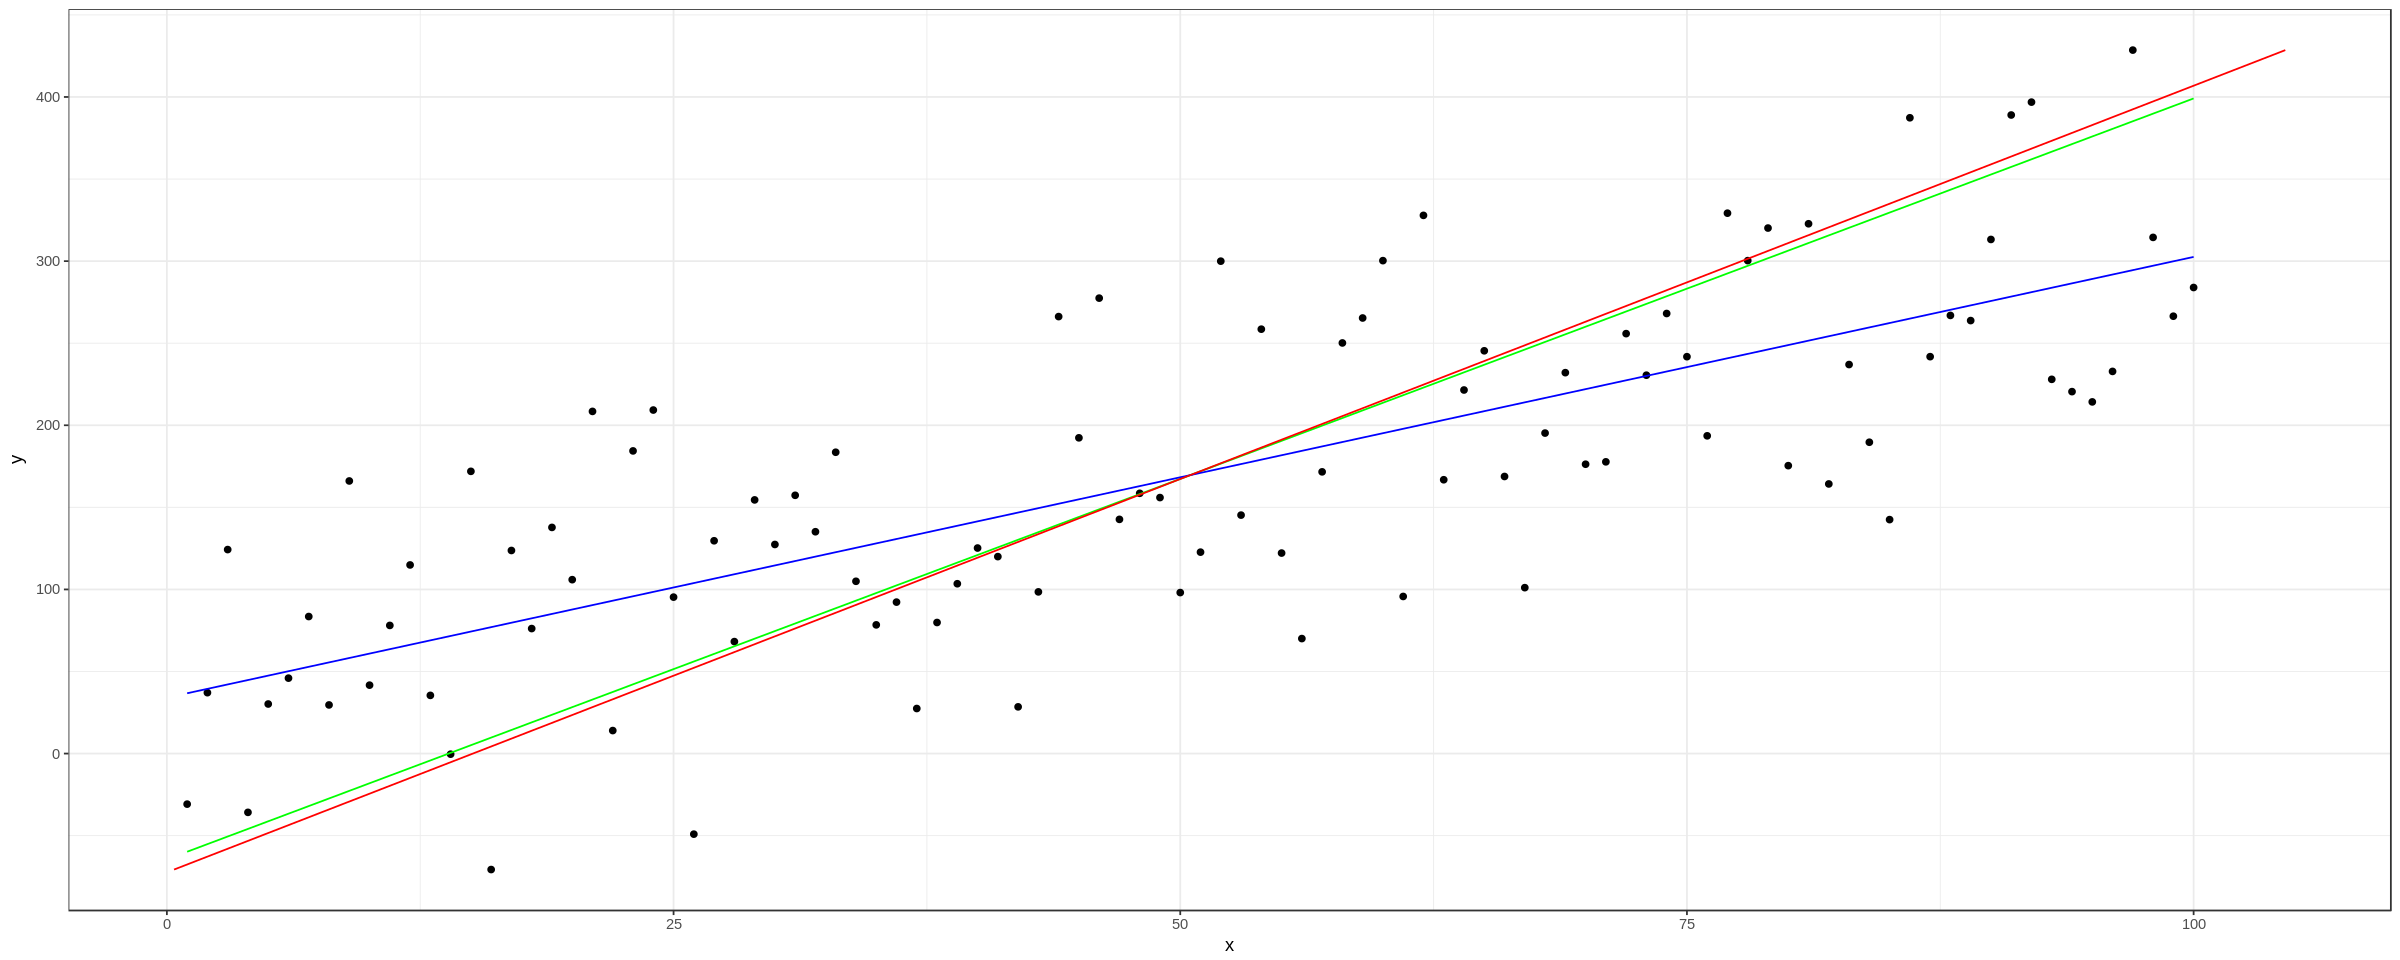

In [20]:
ggplot(df) + 
  theme_bw() +
  geom_point(aes(x = x, y = y), color = "black") +
  geom_line(aes(x = x, y = (pcs[2,1]/pcs[1,1] * x_norm) + mean(yy)), color = "green")+
  geom_line(aes(x = x, y = predicted_y), color = "blue")+
  geom_line(aes(x = predicted_x, y = y), color = "red")